In [1]:
# library

import random
import pandas as pd
import numpy as np
import os
import glob
import cv2
from PIL import Image
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.models as models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor, FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from tqdm.auto import tqdm
from Baseline_func import *

/home/mskang/.conda/envs/taeuk/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


101.36789 124.35773
119.06122 186.27643
93.25846 135.80487


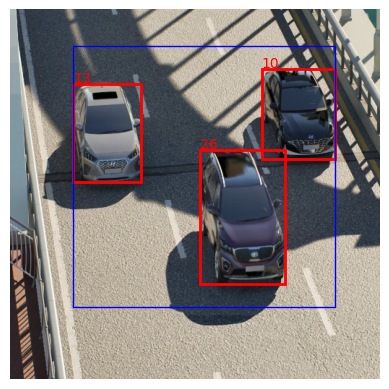

In [12]:
def plot_rectangle(index, pad = None):
    img, bbox, classes = train_dataset[index]
    bbox = bbox.numpy()
    classes = classes.numpy()
    
    fig, axes = plt.subplots()
    axes.axis('off')
    axes.imshow(np.transpose(img, (1,2,0)))
    x_min, x_max, y_min, y_max = 2000, 0, 2000, 0
    for i in range(bbox.shape[0]):
        x1,y1,x2,y2 = bbox[i]
        #
        print(x2-x1,y2-y1)
        x_min = min(x_min, x1, x2)
        x_max = max(x_max, x1, x2)
        y_min = min(y_min, y1, y2)
        y_max = max(y_max, y1, y2)
        label = classes[i]
        rec = patches.Rectangle((x1,y1),x2-x1, y2-y1, 
                                edgecolor='red', facecolor='none')
        rec.set_linewidth(2)
        axes.add_patch(rec)
        axes.text(x1,y1-2,str(label),c='red') 
    if pad is not None:
        x_min, x_max, y_min, y_max = x_min-pad, x_max+pad, y_min-pad, y_max+pad
    x_center, y_center = (x_min+x_max)/2, (y_min+y_max)/2
    hwh = max(x_max-x_min, y_max-y_min)/2
    x_min,x_max,y_min,y_max = x_center-hwh,x_center+hwh,y_center-hwh,y_center+hwh
    rec = patches.Rectangle((x_min,y_min),x_max-x_min, y_max-y_min, 
                                edgecolor='blue', facecolor='none')
    axes.add_patch(rec)
    fig.show()

train_dataset = CustomDataset('./train', train=True, transforms=get_train_transforms(512, 0.1), pad=150)
plot_rectangle(0)  


107.398926 132.14687
126.14493 197.94385
98.80701 144.311
124.82648 146.49022
104.93886 117.38304
119.325615 145.05872
137.3422 151.05743
114.53269 131.61443
129.8432 154.76604
102.4 128.26501
141.4184 166.36415
125.5497 125.72923
105.4804 128.59758
114.573425 137.74876
101.84305 139.26805
100.64958 136.7359
130.67953 151.73817
107.59416 118.6909
108.418686 123.34546
128.52332 149.75076
105.9166 155.0237
104.45975 145.73782
102.25288 136.1498
103.08957 136.95877
101.36566 157.5762
108.60605 184.08438


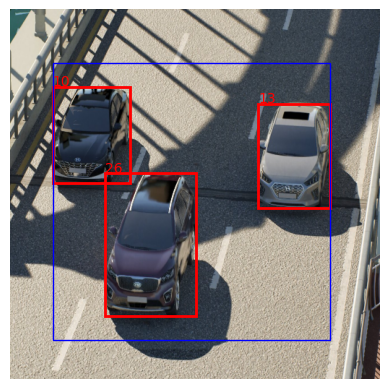

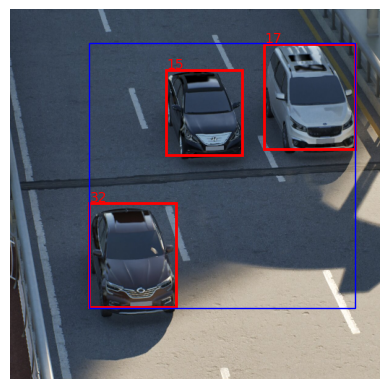

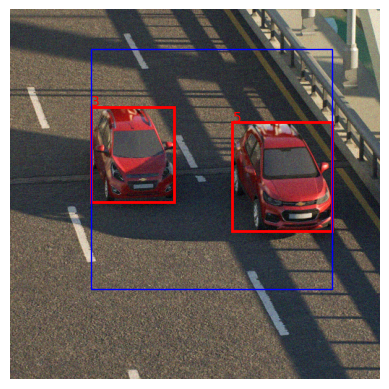

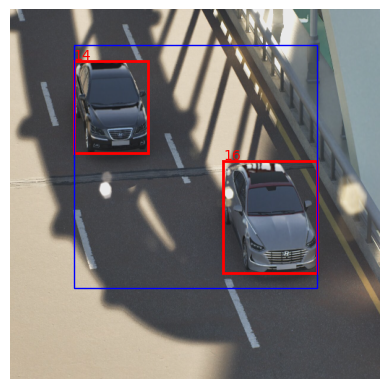

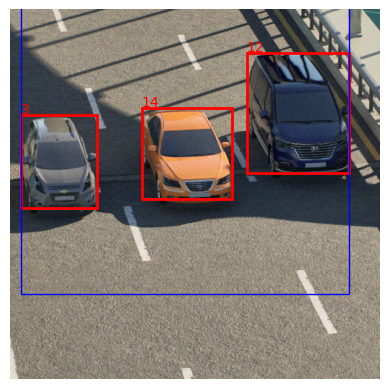

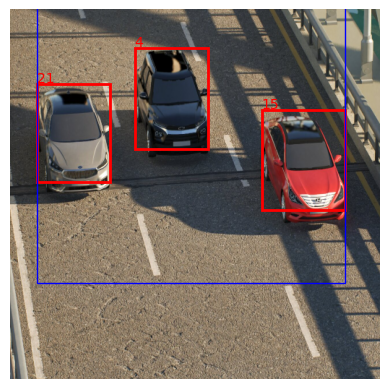

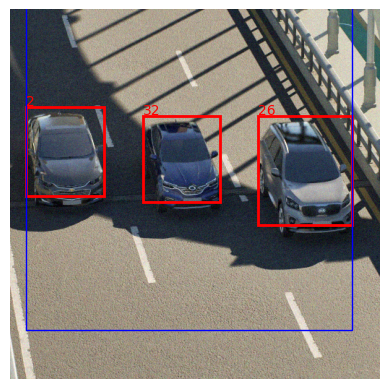

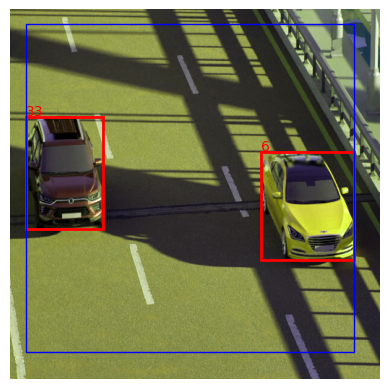

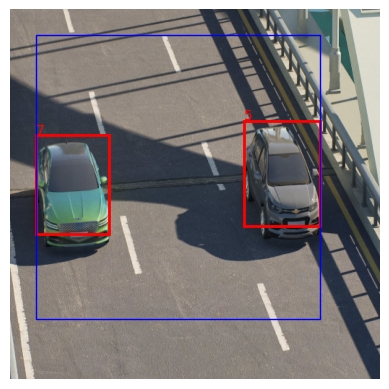

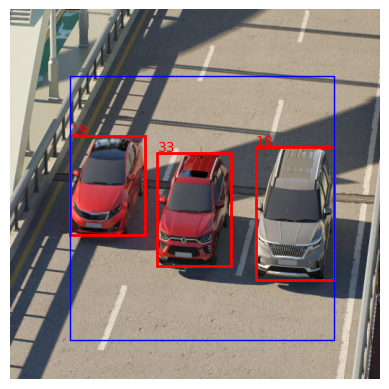

In [14]:
for i in range(30):
    plot_rectangle(i)